In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as pp
from neupy.algorithms import GRNN as grnn
from neupy.estimators import mse

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 外部验证

In [2]:
data_evaluation =pd.read_excel('../Data/Seasonal_XGBoost.xlsx',index_col='Date')[-12:]

In [3]:
data_evaluation

,Incidence_rate,forecast,XGBoost
Date,,,
2014-01-01,6.576894,6.673836,6.449358
2014-02-01,5.693240,5.735268,5.531669
2014-03-01,6.233394,6.345317,6.027709
2014-04-01,6.017185,6.262331,5.942181
2014-05-01,5.868642,6.062793,5.925024
2014-06-01,5.635166,5.606478,5.455212
2014-07-01,5.505367,5.531027,5.269010
2014-08-01,5.249826,5.468642,5.269010
2014-09-01,4.950454,5.122056,5.033227


In [4]:
## 绝对误差
data_evaluation['Dist_ARIMA'] =abs(data_evaluation['forecast']-data_evaluation['Incidence_rate'])
data_evaluation['Dist_XGBoost'] = abs(data_evaluation['XGBoost']-data_evaluation['Incidence_rate'])
data_evaluation['Better'] = data_evaluation['Dist_ARIMA']  - data_evaluation['Dist_XGBoost'] 

data_evaluation['error_ARIMA'] = data_evaluation['forecast']-data_evaluation['Incidence_rate']
data_evaluation['error_XGBoost'] = data_evaluation['XGBoost']-data_evaluation['Incidence_rate']

## 相对误差
data_evaluation['ARIMA_per']  = (data_evaluation['Dist_ARIMA']/data_evaluation['Incidence_rate'])*100
data_evaluation['XGBoost_per'] = (data_evaluation['Dist_XGBoost']/data_evaluation['Incidence_rate'])*100

print(np.mean(data_evaluation['ARIMA_per']))
print(np.mean(data_evaluation['XGBoost_per']))

2.43136743292
2.00428865041


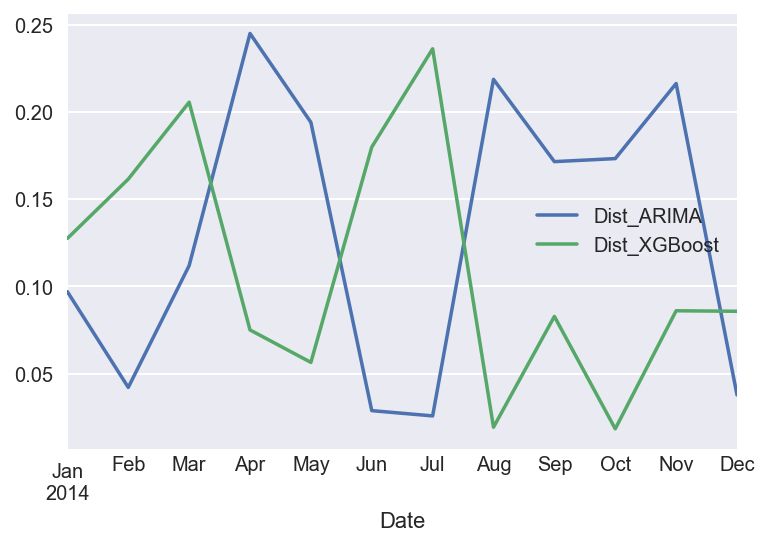

In [5]:
data_evaluation[['Dist_ARIMA','Dist_XGBoost']].plot()

In [6]:
np.mean(data_evaluation['Dist_ARIMA'])

0.13020384563589063

In [7]:
np.mean(data_evaluation['Dist_XGBoost'])

0.11120179521394576

In [8]:
sum(data_evaluation['Better']>0)

6

In [9]:
sum(data_evaluation['Better'])

0.22802460506333855

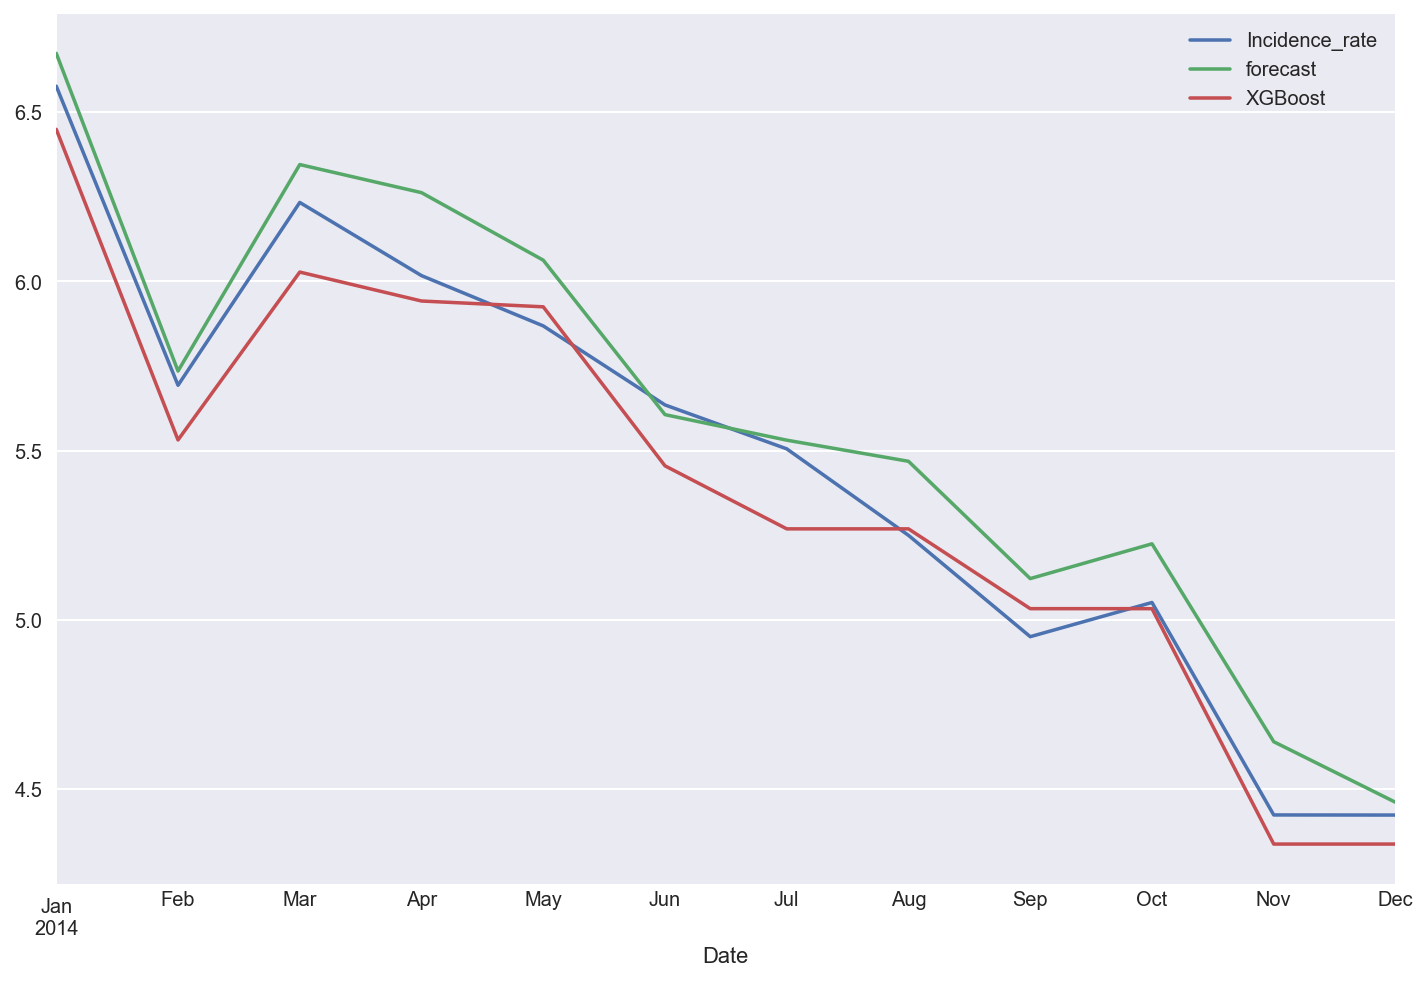

In [10]:
data_evaluation[['Incidence_rate','forecast','XGBoost']].plot(figsize=(12, 8)) 

### 内部验证

In [11]:
data_intro =pd.read_excel('../Data/Seasonal_XGBoost.xlsx',index_col='Date')[:-12]

In [12]:
## 绝对误差
data_intro['Dist_ARIMA'] =abs(data_intro['forecast']-data_intro['Incidence_rate'])
data_intro['Dist_XGBoost'] = abs(data_intro['XGBoost']-data_intro['Incidence_rate'])
data_intro['Better'] = data_intro['Dist_ARIMA']  - data_intro['Dist_XGBoost'] 

data_intro['error_ARIMA'] = data_intro['forecast']-data_intro['Incidence_rate']
data_intro['error_XGBoost'] = data_intro['XGBoost']-data_intro['Incidence_rate']

## 相对误差
data_intro['ARIMA_per']  = (data_intro['Dist_ARIMA']/data_intro['Incidence_rate'])*100
data_intro['XGBoost_per'] = (data_intro['Dist_XGBoost']/data_intro['Incidence_rate'])*100

print(np.mean(data_intro['ARIMA_per']))
print(np.mean(data_intro['XGBoost_per']))

5.1015488357
3.80340903105


In [13]:
np.mean(data_intro['Dist_ARIMA'])

0.33805778418808308

In [14]:
np.mean(data_intro['Dist_XGBoost'])

0.2561768559901404

In [15]:
np.mean(data_intro['Better']>0)

0.52631578947368418

In [16]:
sum(data_intro['Better'])

7.7786881788045532

In [17]:
np.mean(data_intro['Better'])/data_intro['Incidence_rate'].mean()*100

1.2589199786598495

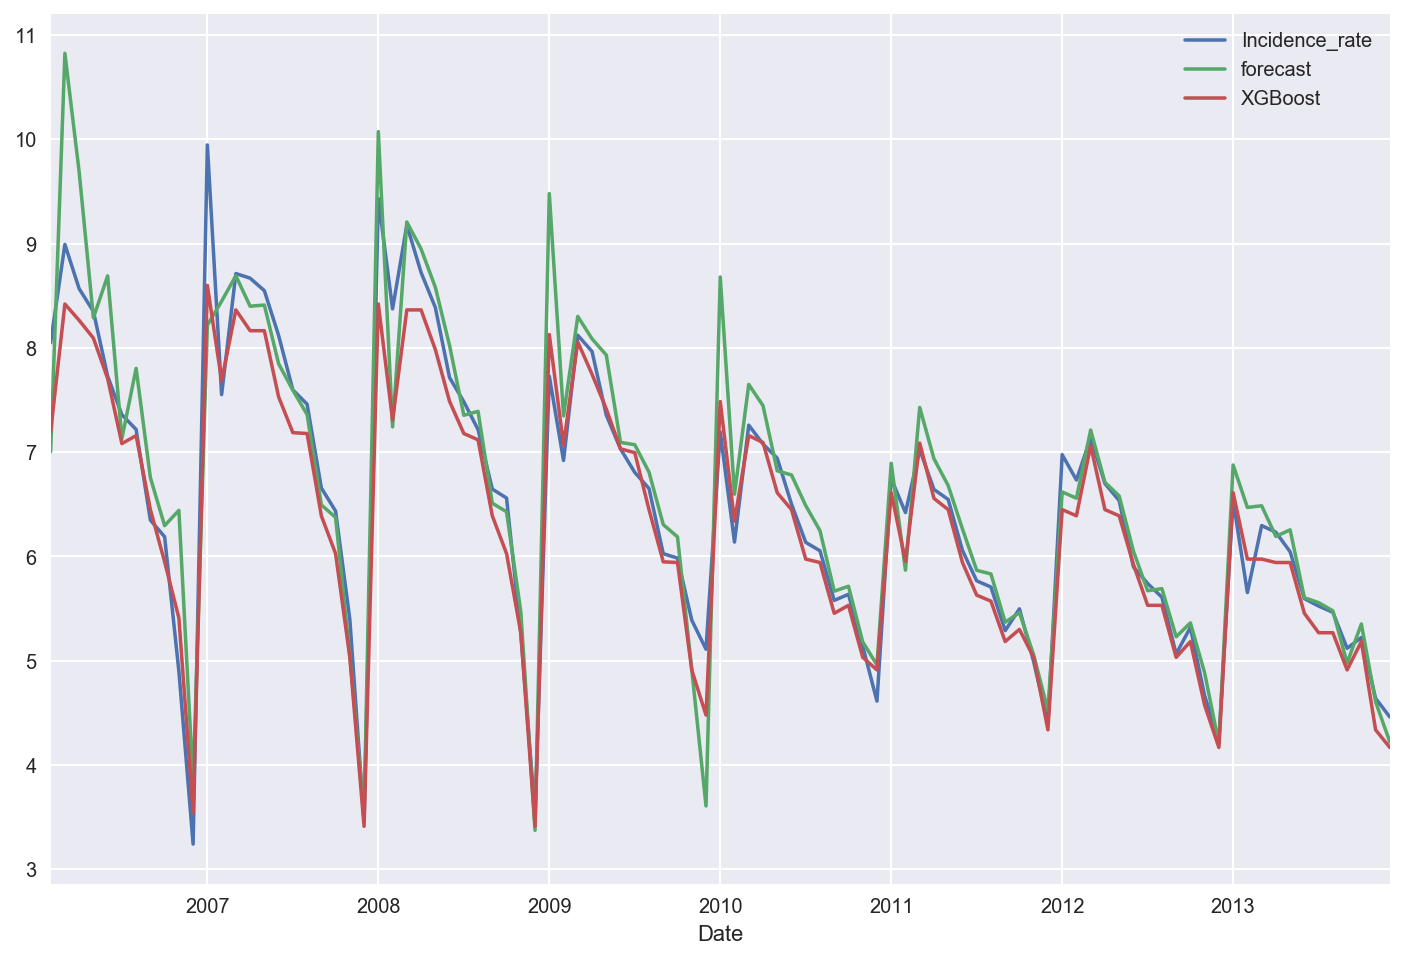

In [18]:
data_intro[['Incidence_rate','forecast','XGBoost']].plot(figsize=(12, 8)) 

### 数据集验证

In [20]:
data_total =pd.read_excel('../Data/Seasonal_XGBoost.xlsx',index_col='Date')

In [24]:
## 绝对误差
data_total['Dist_ARIMA'] =abs(data_total['forecast']-data_total['Incidence_rate'])
data_total['Dist_XGBoost'] = abs(data_total['XGBoost']-data_total['Incidence_rate'])
data_total['Better'] = data_total['Dist_ARIMA']  - data_total['Dist_XGBoost'] 

data_total['error_ARIMA'] = data_total['forecast']-data_total['Incidence_rate']
data_total['error_XGBoost'] = data_total['XGBoost']-data_total['Incidence_rate']

## 相对误差
data_total['ARIMA_per']  = (data_total['Dist_ARIMA']/data_total['Incidence_rate'])*100
data_total['XGBoost_per'] = (data_total['Dist_XGBoost']/data_total['Incidence_rate'])*100

print(np.mean(data_total['ARIMA_per']))
print(np.mean(data_total['XGBoost_per']))

4.80208923913
3.60163852107


In [25]:
np.mean(data_total['Dist_ARIMA'])

0.31474706210746334

In [28]:
np.mean(data_total['Dist_XGBoost'])

0.23991797066944565

In [29]:
np.mean(data_total['Better']>0)

0.52336448598130836

In [30]:
sum(data_total['Better'])

8.0067127838678935

In [31]:
np.mean(data_total['Better'])/data_total['Incidence_rate'].mean()*100

1.1714032617938031

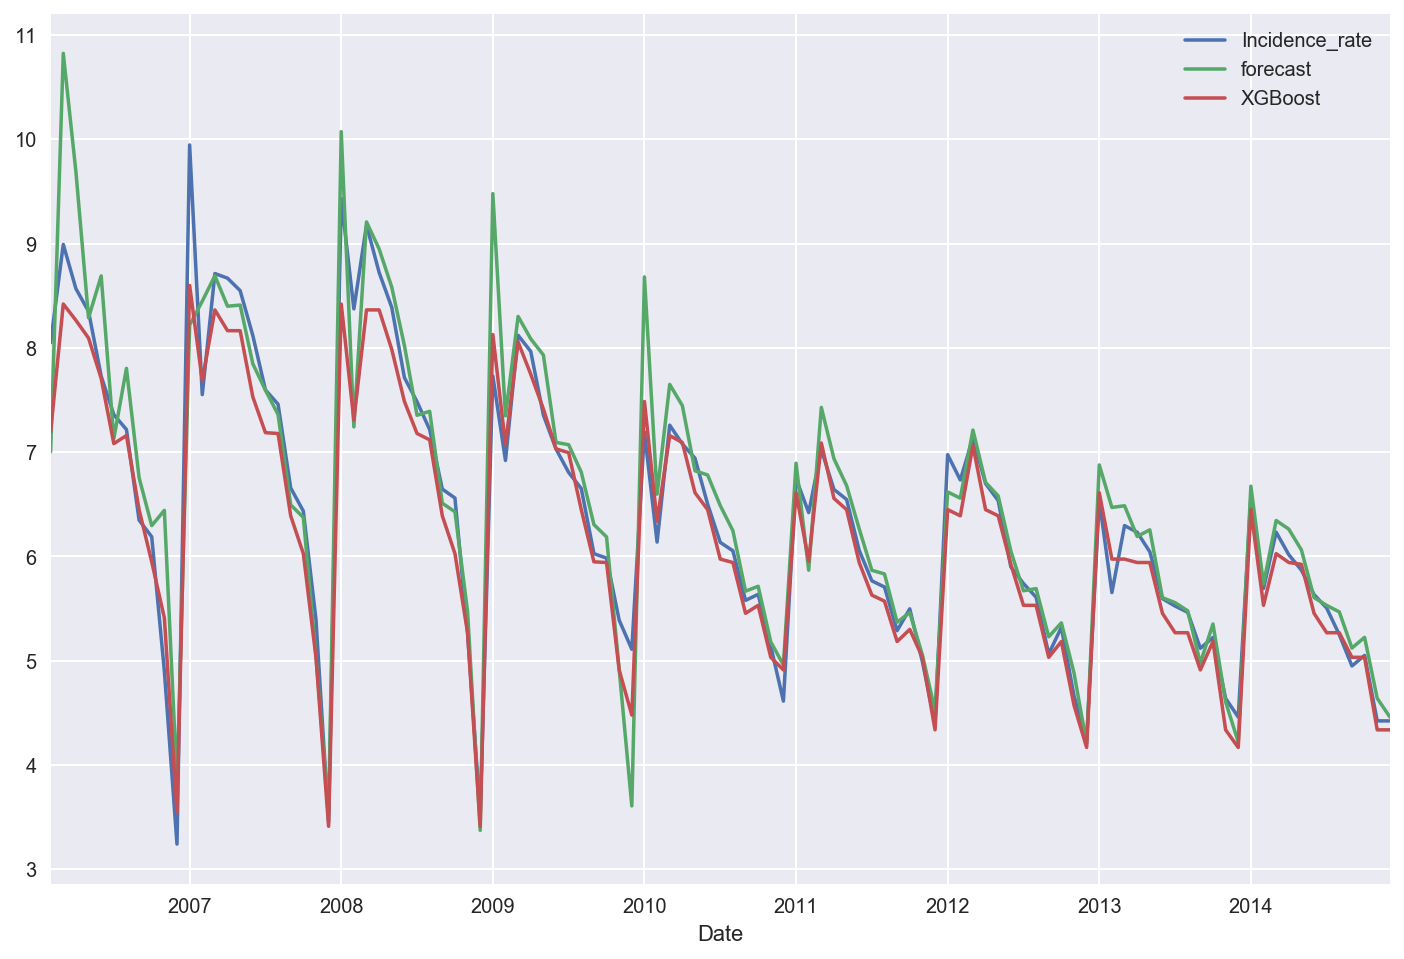

In [33]:
data_total[['Incidence_rate','forecast','XGBoost']].plot(figsize=(12, 8)) 

### 残差检验

In [36]:
data_total[['Dist_ARIMA','Dist_XGBoost']]

,Dist_ARIMA,Dist_XGBoost
Date,,
2006-02-01,1.046743,0.852720
2006-03-01,1.831927,0.571387
2006-04-01,1.121004,0.303408
2006-05-01,0.061619,0.256067
2006-06-01,0.961425,0.022010
2006-07-01,0.228896,0.276756
2006-08-01,0.585976,0.058283
2006-09-01,0.407226,0.100816
2006-10-01,0.107016,0.240107


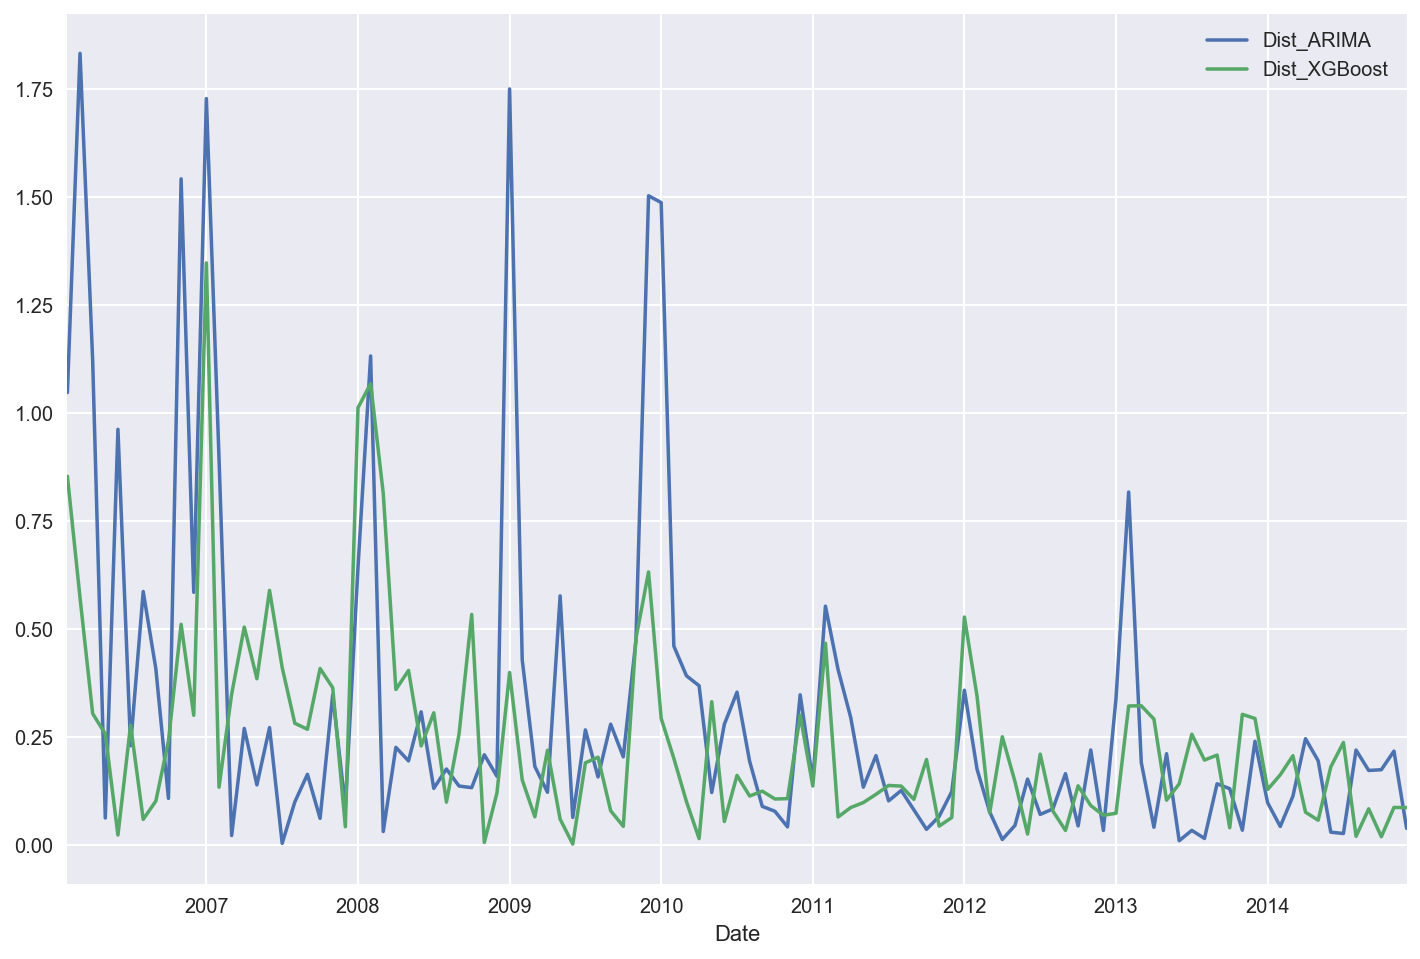

In [37]:
data_total[['Dist_ARIMA','Dist_XGBoost']].plot(figsize=(12, 8)) 